# Covid-19 - Brasil
## Redes Complexas - 2020/1
Alunos: 
1. Johnny Gomes
2. Nomeriano Neto
3. Reinaldo Ribeiro

In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Entendimento dos dados a partir de graficos e outros indicadores 

In [ ]:
# import sys
# print(sys.version)
# print(nx.__version__)

In [2]:
# lê info regionais - divididos por estados, inclusive
df = pd.read_csv("./data/covid_regioes.csv")
df.sample(5)

,regiao,estado,coduf,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
1113,Nordeste,AL,27,13/04/20,16,50,2,3,0
2182,Centro-Oeste,GO,52,22/03/20,13,21,1,0,0
2190,Centro-Oeste,GO,52,30/03/20,14,61,3,1,0
1313,Nordeste,BA,29,02/05/20,18,3267,182,123,6
387,Norte,PA,15,17/05/20,21,13864,680,1239,40


In [3]:
# reordena registros (rows) do dataframe para que estados aparecam em ordem alfabetica:

df.sort_values(by=['estado', 'semanaEpi'], inplace=True, ignore_index=True)

df.head()

,regiao,estado,coduf,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,Norte,AC,12,19/03/20,12,3,3,0,0
1,Norte,AC,12,20/03/20,12,7,4,0,0
2,Norte,AC,12,21/03/20,12,9,2,0,0
3,Norte,AC,12,22/03/20,13,11,2,0,0
4,Norte,AC,12,23/03/20,13,11,0,0,0


In [ ]:

df.shape


In [ ]:

df.info()


In [4]:
# le dados a partir do pandas dataframe:

# G = nx.from_pandas_edgelist(df, source='pais', target='regiao')
G = nx.from_pandas_edgelist(df, source='regiao', target='estado')


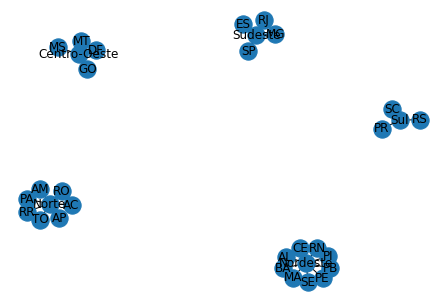

In [5]:

nx.draw(G, with_labels=True)


In [8]:
# cria lista -- em ordem alfabetica -- de nós-estados:
estados = df.estado.unique()
estados = list(estados)

# cria lista -- em ordem alfabetica -- de nós-regioes:
regioes = df.regiao.unique()
regioes = list(regioes)


In [9]:
# instancia nós-estado com parametros iguais a todos:
for e in estados:
    G.add_node(e,
              dim='estado',
              totalCasos = 0,
              totalMortes = 0,
              temperatura=0)

for r in regioes:
    G.add_node(r,
              dim='regiao',
              totalCasos = 0,
              totalMortes = 0,
              temperatura=0)

In [10]:
color_map = []
for no in G.nodes(data=True):
    if (no[1]['dim'] == 'regiao'):
        color_map.append('green')
    else: 
        color_map.append('blue')

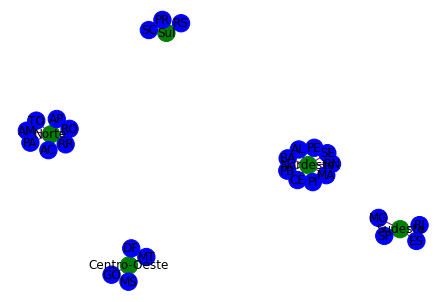

In [11]:
# desenha o grafo G:

nx.draw(G, node_color=color_map, edge_color='purple', with_labels=True)


In [ ]:
for node in G.nodes(data=True):
    print(node)

In [ ]:
# informacoes sobre o grafo atual:

nx.info(G)


In [ ]:
df.sample(5)

In [ ]:
# definidos/instanciados anteriormente no inicio do notebook:

print(estados, regioes)


In [ ]:
# aqui apenas para matar a curiosidade quanto a estrutura alternativa do dataframe:
# total = df.groupby(['regiao','estado'])
# total.first()

In [12]:

tot_est     = df.groupby('estado')['casosAcumulado'].max()
tot_est_sum = df.groupby('estado')['casosAcumulado'].max().sum()

tot_reg     = df.groupby(['regiao', 'estado'])['casosAcumulado'].max()
tot_reg_sum = df.groupby(['regiao', 'estado'])['casosAcumulado'].max().sum()

In [ ]:
# print(tot_reg)
# print(tot_reg_sum)

In [13]:
est_list = dict(tot_est)
est_list

{'AC': 8128,
 'AL': 15706,
 'AM': 49811,
 'AP': 13294,
 'BA': 28715,
 'CE': 65605,
 'DF': 16629,
 'ES': 20659,
 'GO': 6124,
 'MA': 49371,
 'MG': 15883,
 'MS': 2324,
 'MT': 4100,
 'PA': 56032,
 'PB': 20951,
 'PE': 40705,
 'PI': 7621,
 'PR': 7031,
 'RJ': 69499,
 'RN': 10888,
 'RO': 8626,
 'RR': 5768,
 'RS': 12250,
 'SC': 11565,
 'SE': 9727,
 'SP': 144593,
 'TO': 5807}

In [14]:
# atribui casos acumulados a cada no-estado:

for no in G.nodes(data=True):
    if (no[1]['dim'] == 'estado'):
#         print(no)
        for caso_estado in est_list:
            if (no[0]==caso_estado):
                no[1]['totalCasos'] = est_list[caso_estado]
#                 print(no[0], '->', caso_estado)
     

In [15]:
# just for fun:

for no in G.nodes(data=True):
    if (no[1]['dim'] == 'estado'):
        print(no)


('AC', {'dim': 'estado', 'totalCasos': 8128, 'totalMortes': 0, 'temperatura': 0})
('AL', {'dim': 'estado', 'totalCasos': 15706, 'totalMortes': 0, 'temperatura': 0})
('AM', {'dim': 'estado', 'totalCasos': 49811, 'totalMortes': 0, 'temperatura': 0})
('AP', {'dim': 'estado', 'totalCasos': 13294, 'totalMortes': 0, 'temperatura': 0})
('BA', {'dim': 'estado', 'totalCasos': 28715, 'totalMortes': 0, 'temperatura': 0})
('CE', {'dim': 'estado', 'totalCasos': 65605, 'totalMortes': 0, 'temperatura': 0})
('DF', {'dim': 'estado', 'totalCasos': 16629, 'totalMortes': 0, 'temperatura': 0})
('ES', {'dim': 'estado', 'totalCasos': 20659, 'totalMortes': 0, 'temperatura': 0})
('GO', {'dim': 'estado', 'totalCasos': 6124, 'totalMortes': 0, 'temperatura': 0})
('MA', {'dim': 'estado', 'totalCasos': 49371, 'totalMortes': 0, 'temperatura': 0})
('MG', {'dim': 'estado', 'totalCasos': 15883, 'totalMortes': 0, 'temperatura': 0})
('MS', {'dim': 'estado', 'totalCasos': 2324, 'totalMortes': 0, 'temperatura': 0})
('MT', 

In [16]:
# soma casos dos estados e aribui a respectiva regiao:

casos_regiao = {}
for regiao in regioes:
    # encontra vizinhos (conectados) ao no-regiao
    est = G.neighbors(regiao)
    estados_da_regiao = list(est)
    sum_casos_regiao = 0
    for est in estados_da_regiao:
        sum_casos_regiao += G.nodes[est]['totalCasos']
        # cria dicionario dinamicamente:
        casos_regiao[regiao] = sum_casos_regiao

# sum_casos_regiao
print(casos_regiao)


{'Norte': 147466, 'Nordeste': 249289, 'Centro-Oeste': 29177, 'Sudeste': 250634, 'Sul': 30846}


In [17]:
# atribui total de casos aos nos-regioes:

for regiao in regioes:
    G.nodes[regiao]['totalCasos'] = casos_regiao[regiao]

In [18]:
for no in G.nodes(data=True):
    print(no)

('Norte', {'dim': 'regiao', 'totalCasos': 147466, 'totalMortes': 0, 'temperatura': 0})
('AC', {'dim': 'estado', 'totalCasos': 8128, 'totalMortes': 0, 'temperatura': 0})
('Nordeste', {'dim': 'regiao', 'totalCasos': 249289, 'totalMortes': 0, 'temperatura': 0})
('AL', {'dim': 'estado', 'totalCasos': 15706, 'totalMortes': 0, 'temperatura': 0})
('AM', {'dim': 'estado', 'totalCasos': 49811, 'totalMortes': 0, 'temperatura': 0})
('AP', {'dim': 'estado', 'totalCasos': 13294, 'totalMortes': 0, 'temperatura': 0})
('BA', {'dim': 'estado', 'totalCasos': 28715, 'totalMortes': 0, 'temperatura': 0})
('CE', {'dim': 'estado', 'totalCasos': 65605, 'totalMortes': 0, 'temperatura': 0})
('Centro-Oeste', {'dim': 'regiao', 'totalCasos': 29177, 'totalMortes': 0, 'temperatura': 0})
('DF', {'dim': 'estado', 'totalCasos': 16629, 'totalMortes': 0, 'temperatura': 0})
('Sudeste', {'dim': 'regiao', 'totalCasos': 250634, 'totalMortes': 0, 'temperatura': 0})
('ES', {'dim': 'estado', 'totalCasos': 20659, 'totalMortes': 

In [ ]:
# ---------------------------------------------------------------- #
#             CRIAR ARESTAS QUE FALTAM AO GRAFO:
# ---------------------------------------------------------------- #

In [19]:
# 1 - cria arestas a partir da distribuicao geografica das regioes:

G.add_edges_from(
    [('Norte', 'Nordeste'), ('Norte', 'Centro-Oeste'), ('Nordeste', 'Centro-Oeste'), ('Nordeste', 'Sudeste'),
     ('Centro-Oeste', 'Sudeste'),('Centro-Oeste', 'Sul'), ('Sudeste', 'Sul')])


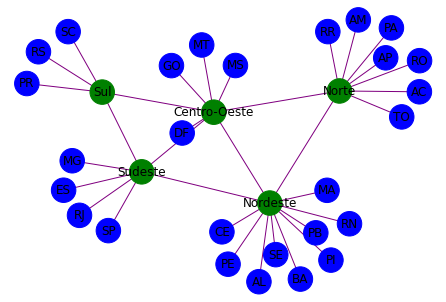

In [20]:
nx.draw(G, node_color=color_map, edge_color='purple', node_size=600, with_labels=True)

In [21]:
# cria arestas a partir da disposicao geografica entre nos-estados por regiao:

# 1. Regiao Sul:
G.add_edges_from(
    [('RS', 'SC'),('SC', 'PR')]) # ok

# 2. Sudeste:
G.add_edges_from(
    [('SP', 'MG'), ('SP', 'RJ'), ('RJ', 'MG'),('RJ', 'ES'),('ES', 'MG')]) # ok

# 3. Centro-Oeste:
G.add_edges_from(
    [('DF', 'GO'), ('GO', 'MT'),('GO', 'MS'),('MT','MS')]) # ok

# 4. Norte:
G.add_edges_from(
    [('TO', 'PA'),('PA', 'AP'),('PA', 'RR'),('PA', 'AM'),('AM', 'AC'),
     ('AM', 'RO'),('AM','RR'),('AC', 'RO')]) # ok

# 5. Nordeste:
G.add_edges_from(
    [('BA', 'SE'), ('BA', 'AL'),('BA', 'PE'),('BA', 'PI'),('PE', 'PB'),
     ('PE', 'CE'),('PE', 'PI'),('CE', 'PI'),('CE', 'PB'),('SE','AL'),
     ('AL','PE'),('CE', 'RN'),('PB', 'RN'),('PI','MA')]) # ok


In [22]:
# mapeia as arestas extra-regionais:

G.add_edges_from(
    [('PR', 'SP'),('PR', 'MS'),('ES', 'BA'),('MG', 'BA'),('SP', 'MS'),('MG', 'GO'),
     ('TO', 'GO'),('TO', 'MT'),('TO', 'MA'),('TO','PI'),('TO','BA'),
     ('GO','BA'),('PA','MA'),('PA','MT'),('RO','MT')])


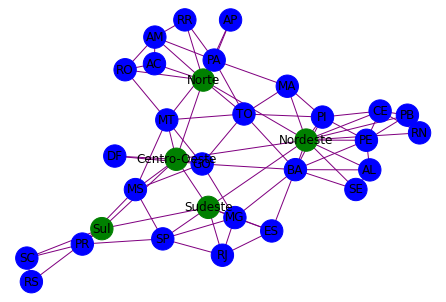

In [23]:
# desenha o grafo em sua estrutura final em relacao vertices a arestas:


nx.draw(G, node_color=color_map, edge_color='purple', node_size=500, with_labels=True)


In [42]:
# usa bokeh para plotar o grafo:

from bokeh.io import output_file, show
# from bokeh.plotting import figure, from_networkx

from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool,)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx


In [53]:
SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "black", "red"
edge_attrs = {}

for start_node, end_node, _ in G.edges(data=True):
    edge_color = SAME_CLUB_COLOR if G.nodes[start_node]["dim"] == G.nodes[end_node]["dim"] else DIFFERENT_CLUB_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(G, edge_attrs, "edge_color")

# Show with Bokeh
plot = Plot(plot_width=600, plot_height=600,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Covid-19 Estados/Regioes/Brasil"

node_hover_tool = HoverTool(tooltips=[("", "@index"), ("Casos", "@totalCasos")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=30, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="edge_color", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

output_file("covid19.html")
show(plot)

In [45]:
H = nx.karate_club_graph()

In [46]:
for no in H.nodes(data=True):
    print(no)

(0, {'club': 'Mr. Hi'})
(1, {'club': 'Mr. Hi'})
(2, {'club': 'Mr. Hi'})
(3, {'club': 'Mr. Hi'})
(4, {'club': 'Mr. Hi'})
(5, {'club': 'Mr. Hi'})
(6, {'club': 'Mr. Hi'})
(7, {'club': 'Mr. Hi'})
(8, {'club': 'Mr. Hi'})
(9, {'club': 'Officer'})
(10, {'club': 'Mr. Hi'})
(11, {'club': 'Mr. Hi'})
(12, {'club': 'Mr. Hi'})
(13, {'club': 'Mr. Hi'})
(14, {'club': 'Officer'})
(15, {'club': 'Officer'})
(16, {'club': 'Mr. Hi'})
(17, {'club': 'Mr. Hi'})
(18, {'club': 'Officer'})
(19, {'club': 'Mr. Hi'})
(20, {'club': 'Officer'})
(21, {'club': 'Mr. Hi'})
(22, {'club': 'Officer'})
(23, {'club': 'Officer'})
(24, {'club': 'Officer'})
(25, {'club': 'Officer'})
(26, {'club': 'Officer'})
(27, {'club': 'Officer'})
(28, {'club': 'Officer'})
(29, {'club': 'Officer'})
(30, {'club': 'Officer'})
(31, {'club': 'Officer'})
(32, {'club': 'Officer'})
(33, {'club': 'Officer'})


In [ ]:
# 6 - animar o grafo e adicionar 'hover' com informacoes de numero de casos/mortes e/ou outras:


In [ ]:
# grafico do crescimento de novos casos ao longos das semanas (estado == 'TO')


In [ ]:
# grafico do crescimento de novos casos ao longos das semanas (estado == 'AM')


In [ ]:
# pega total de casos acumulados no Tocantins:


### Documentacao do processo - Pipeline da Produção da Rede Covid-19 - Brasil


Obs.: Esse _pipeline_ foi desenvolvido para trabalhos na área de **Descoberta de Conhecimento**, entretanto a certo ponto os passos bem definidos podem ajudar na compreensão e tratamento dos dados e posterior obtenção e apresentação do conhecimento obtido.

mais informações em: [KDD - Descoberta de Conhecimento em Bases de Dados](https://lume.ufrgs.br/handle/10183/8968)

### 1. Entendimento do dominio da aplicação:

Estudamos sobre Covid-19 e sobre a propagacao do virus pelo mundo

### 2. Criação da base de dados de interesse:

A base de dados foi criada por orgao federal e disponibilizada em:
[Saúde.Gov](https://covid.saude.gov.br/) mais informacoes em [SUS Analítico](https://susanalitico.saude.gov.br/)

### 3. Limpeza de dados e pré processamento:

#### 3.a) Limpeza dos dados:

Dividimos a base original em tres arquivos contendo: 
    1. Dados gerais do pais;
    2. Dados regionais;
    3. Dados estaduais e municipais;
    
Algumas colunas se fizeram desnecessarias, como o numero de habitantes em cada uma dessas microregioes por isso, foram descartadas da base em que trabalhamos.

#### 3.b) Integração dos dados:

Nao houve integracao de dados novos ou externos à base já existente.

#### 3.c) Transformação dos dados:

### 4. Redução e Projeção de Dados:

### 5. Escolha das funções de mineração:

### 6. Escolha dos algoritmos de mineração:

### 7. Mineração:

### 8. Interpretação dos dados:

### 9. Utilização/Publicação/Compartilhamento do conhecimento descoberto: